In [37]:
import colorfulCircles as cc
import pisgmMain as pisgm

In [38]:
disc = cc.makeRainbowDiscQuick(256)

Pixels generated for radius 1.
Pixels generated for radius 2.
Pixels generated for radius 3.
Pixels generated for radius 4.
Pixels generated for radius 5.
Pixels generated for radius 6.
Pixels generated for radius 7.
Pixels generated for radius 8.
Pixels generated for radius 9.
Pixels generated for radius 10.
Pixels generated for radius 11.
Pixels generated for radius 12.
Pixels generated for radius 13.
Pixels generated for radius 14.
Pixels generated for radius 15.
Pixels generated for radius 16.
Pixels generated for radius 17.
Pixels generated for radius 18.
Pixels generated for radius 19.
Pixels generated for radius 20.
Pixels generated for radius 21.
Pixels generated for radius 22.
Pixels generated for radius 23.
Pixels generated for radius 24.
Pixels generated for radius 25.
Pixels generated for radius 26.
Pixels generated for radius 27.
Pixels generated for radius 28.
Pixels generated for radius 29.
Pixels generated for radius 30.
Pixels generated for radius 31.
Pixels generated 

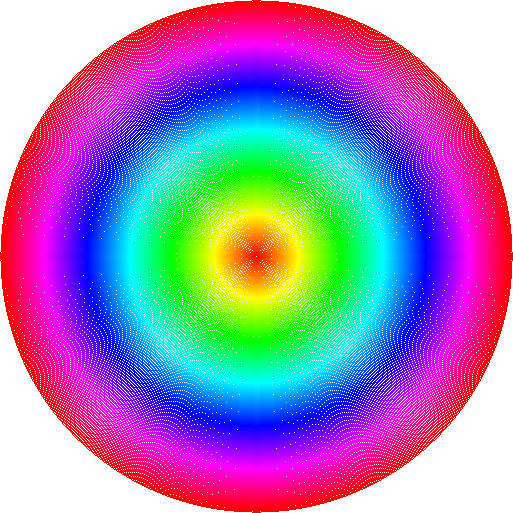

In [39]:
disc

In [40]:
discData = b''
for i in range(disc.size[0] * disc.size[1]):
    discData += bytes(disc.getdata()[i])
len(discData)

1052676

In [41]:
myID = 8270950596653088861
altID = 4994496195162594573
gid = 3911253593270387734

In [42]:
myKeyU = pisgm.rsa.publicKey("../server/testingData/8270950596653088861-U.pem")
myKeyR = pisgm.rsa.privateKey("../server/testingData/8270950596653088861-R.pem")
altKeyU = pisgm.rsa.publicKey("../server/testingData/4994496195162594573-U.pem")
altKeyR = pisgm.rsa.privateKey("../server/testingData/4994496195162594573-R.pem")

In [43]:
reply = pisgm.makeRequest(altKeyR, altID, gid)

Timestamp:  1588185901 
Nonce:  293312921092723757095311141945133297780 
Request:  32 b'^\xa9\xcb-\xdc\xaa\x03\x87#\xbd\x1b\xe1\x0b\xee\xd6\xfb\x1a\xa0\xf0tAEVQA9PYtN0N' 
Signature:  256 b'I1\xfasIuv\xc0\xdcu\xb1Q[\xd0\xa9oI\xc5\xed\x95\x8cb\xd5E\x9c3T\x91\xc7\xab\xc2b\xd3\xe4\x83\xbe\x91+)Lz\x85}\x0c\xebsr\xb9\x07\xd0;&\x9d\xfc&\xea%\xb5\xccF\xe6\xb08\xbc\x14-\xa9M\xd6\xcf\xf9`\xf5\xd6\xef7\xf0\xd4\xba\x10\xb4\x07>\xc5@VbG\xacU\xc6r\x14\n\xeb\xbd\x9a\x82\xe8\xceSb\x8b\xc6j\xf4UFR\xbd\xd5\xfd?]z2\'u\x9a\xb2\xea\xc0~w\xee\x8d\xd6\xbb\x07\r\xfa]\x1b\x8b1\x06\xe8\x9c\x8e\xea\xb8\x8f\xd2\n\x96\x19\xb0\x0f\xcbT\x94\xae\x87a\xf6@\x14~"\x17L\xda\x16\xaa\x99\x8f\x05\xa3\xfc\xd9\xe2d\xf2l\x80qY\x0e\x1a:\x00\xae\xe5]\x03\xbf\xe8\xfdhe/e\xf8\x10\xc0\x96\xfe\x04\xecr\x96\xe5B\x11\xd5\x83g6}\x18\x1b\xcd\xb0\xbd\xc5\xf5\x8b-q\xd5\xb2\xbf\xec\x8d\x88m\xed\xc2\xbd\x17\xb0\x8ez\x91G\xf2t\x88\xcc!\xe7\xc0\xa5O\xe4\xd0\xb5^k\xbc\x98v;\xc6*P'
b'bSpq0kloKYdQYlfI8jziCy+pUZ5OdVS8xrNkgW1oaX7386mteeAmLt4hfbxxs

In [44]:
import base64
ddb64 = base64.b64encode(discData).decode("ascii")

In [45]:
print(len(ddb64), len(discData))

1403568 1052676


In [46]:
cipherImage = pisgm.makeImage(ddb64, altID, reply)

1403856


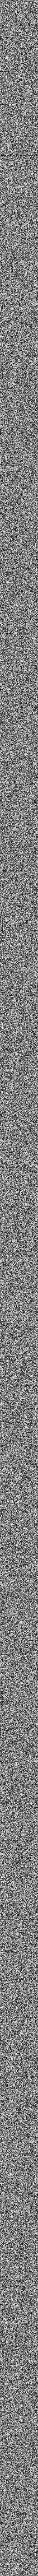

In [47]:
cipherImage

In [48]:
decodedB64 = pisgm.decodeImage(cipherImage, myKeyR, myID, gid)
print(len(decodedB64), len(ddb64))

1403568 1403568


In [49]:
decodedData = base64.b64decode(bytes(decodedB64, "ascii"))
print(len(decodedData), len(discData))

1052676 1052676


In [50]:
from PIL import Image

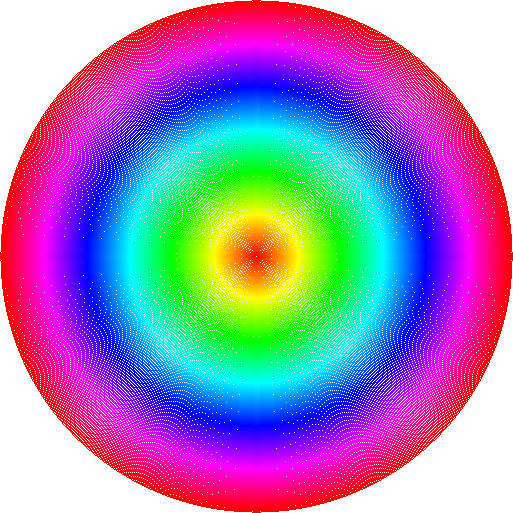

In [51]:
Image.frombytes("RGBA", disc.size, decodedData)